## Esma 3016, lab2
### Edgar Acuna
### Agosto 26, 2019

#### Organizacion y presentacion de datos cuantitativos discretos.Usaremos el modulo pandas, que se usa para hacer analisis estadistico basico y los modulos  matplotlib, seaborn y plotnine que se usan para hacer graficas

In [1]:
import pandas as pd
import seaborn as sns
from plotnine import *
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Leyendo datos de la internet, las columnas tienen nombres
datos=pd.read_csv("http://academic.uprm.edu/eacuna/clase97.txt",sep=" ",na_values="*")
#Viendo las seis primera fila de la tabla de datos
datos.head(10)

,edad,sexo,escuela,programa,creditos,gpa,familia,hestud,htv
0,21,f,publ,biol,119.0,3.60,3,35,10
1,18,f,priv,mbio,15.0,3.60,3,30,10
2,19,f,priv,biot,73.0,3.61,5,5,7
3,20,f,priv,mbio,NaN,2.38,3,14,3
4,21,m,publ,pmed,114.0,3.15,2,25,25
5,20,m,publ,mbio,93.0,3.17,3,17,6
6,22,m,publ,pmed,120.0,2.15,5,20,10
7,20,m,priv,pmed,NaN,3.86,5,15,5
8,20,m,priv,pmed,94.0,3.19,4,10,2
9,20,f,publ,pmed,130.0,3.66,6,20,33


In [4]:
np.mean(datos['creditos'])

100.65217391304348

In [5]:
# Informacion acerca de la base de datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 9 columns):
edad        28 non-null int64
sexo        28 non-null object
escuela     28 non-null object
programa    28 non-null object
creditos    23 non-null float64
gpa         28 non-null float64
familia     28 non-null int64
hestud      28 non-null int64
htv         28 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 2.0+ KB


In [6]:
#Haciendo una funcion que haga la tabla completa de distribucion de frecuencias
def tablafreq(datos,str):
    """
    :param datos: Es el nombre de la base de datos
    :param str: Es el nombre de la variable a usar de la base de datos.
    """
    import pandas as pd
    tab1=pd.crosstab(index=datos[str],columns="counts",colnames=['variable'])
    tab1['frec.relat.porc']=tab1*100/tab1.sum()
    tab1['frec.acum']=tab1.counts.cumsum()
    tab1['frec.relat.porc.acum']=tab1['frec.acum']*100/tab1['counts'].sum()
    return tab1;

In [7]:
help(tablafreq)

Help on function tablafreq in module __main__:

tablafreq(datos, str)
    :param datos: Es el nombre de la base de datos
    :param str: Es el nombre de la variable a usar de la base de datos.



In [8]:
tablafreq(datos,"familia").round(2)

variable,counts,frec.relat.porc,frec.acum,frec.relat.porc.acum
familia,,,,
1,1,3.57,1,3.57
2,3,10.71,4,14.29
3,9,32.14,13,46.43
4,6,21.43,19,67.86
5,8,28.57,27,96.43
6,1,3.57,28,100.00


In [9]:
tablafreq(datos,"edad")

variable,counts,frec.relat.porc,frec.acum,frec.relat.porc.acum
edad,,,,
18,1,3.571429,1,3.571429
19,1,3.571429,2,7.142857
20,12,42.857143,14,50.000000
21,9,32.142857,23,82.142857
22,4,14.285714,27,96.428571
23,1,3.571429,28,100.000000


In [10]:
# Hallando las frecuencias absolutas de la variable edad
tablaf = pd.crosstab(index=datos["edad"],columns="counts")
tablaf

col_0,counts
edad,
18,1
19,1
20,12
21,9
22,4
23,1


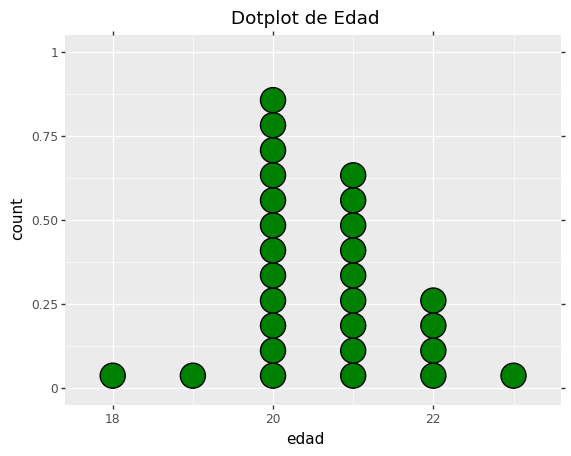

<ggplot: (91418340605)>

In [11]:
#haciendo Dotplot usando plotnine
ggplot(datos, aes(x='edad'))+geom_dotplot(dotsize=.5,fill='green')+ggtitle("Dotplot de Edad")

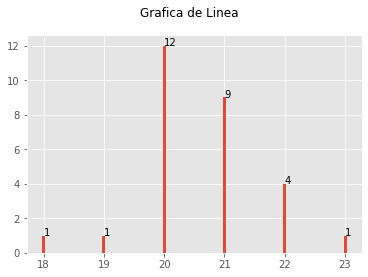

In [12]:
#Haciendo grafica de linea
plt.figure().suptitle('Grafica de Linea')
with plt.style.context('ggplot'):
    # plot command goes here
    plt.bar(tablaf.index[0:6],tablaf.loc[tablaf.index[0:6]]['counts'],width=.05)
for a,b in zip(tablaf.index[0:6],tablaf.loc[tablaf.index[0:6]]['counts']):
    plt.text(a,b,b) 
plt.show()

#### La  grafica es algo simetrica y no hay datos atipicos("outliers")